In [1]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Zad
Zczytaj z wikipedi artykuły o tytułach 
```python
["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]
```
i zapisz w tablicy zawartości tych podstron ($id="bodyContent"$)

In [2]:
wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]



In [3]:
def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div",id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

articles[0][:200]

'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that ar'

In [4]:
import re
articles = [re.sub("<.+?>"," ",a) for a in articles] # ew (str(a))

In [5]:
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus ; its inverse operation,  differentiation , is the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral  of  f  over  x  from  a  to  b , that is:  [1]    [2]  \n   can be interpreted informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . The area above the  x -axis adds to the total, and that below the  x -axis subtracts from the total.\n   The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  F 

In [6]:
articles[1]

' In the branch of  mathematics  known as  real analysis , the  Riemann integral , created by  Bernhard Riemann , was the first rigorous definition of the  integral  of a  function  on an  interval .  It was presented to the faculty at the  University of Göttingen  in 1854, but not published in a journal until 1868.  [1]   For many functions and practical applications, the Riemann integral can be evaluated by the  fundamental theorem of calculus  or approximated by  numerical integration .\n   The Riemann integral is unsuitable for many theoretical purposes. Some of the technical deficiencies in Riemann integration can be remedied with the  Riemann–Stieltjes integral , and most disappear with the  Lebesgue integral , though the latter does not have a satisfactory treatment of  improper integrals .  The  gauge integral  is a generalisation of the Lebesgue integral that is at once closer to the Riemann integral.   \nThese more general theories allow for the integration of more "jagged" o

In [9]:
import numpy as np
with open ('wiki_mycorpus.txt', 'w', encoding="utf-8") as f:
    for el in articles:
        f.write(el)

# Zad

Oczyszczamy tekst:

* tokenizacja

* usuwanie stopwords

* usuwanie tokenów występujących tylko 1 raz

* zmiana dużych liter na małe



In [10]:
from pprint import pprint  # pretty-printer
from collections import defaultdict
from nltk.corpus import stopwords
import string

# remove common words and tokenize
stoplist = set('for a of the and to in'.split() + list(string.punctuation) + stopwords.words('english') )
texts = [[word for word in articles.lower().split() if word not in stoplist] for articles in articles]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
         for text in texts]
print(len(texts))
pprint(texts)

11
[['mathematics',
  'integral',
  'assigns',
  'numbers',
  'functions',
  'way',
  'describe',
  'displacement,',
  'area,',
  'volume,',
  'concepts',
  'arise',
  'combining',
  'infinitesimal',
  'integration',
  'one',
  'two',
  'main',
  'operations',
  'calculus',
  'inverse',
  'differentiation',
  'other.',
  'given',
  'function',
  'f',
  'real',
  'variable',
  'x',
  'interval',
  'b',
  'real',
  'line',
  'definite',
  'integral',
  'f',
  'x',
  'b',
  'is:',
  '[1]',
  '[2]',
  'interpreted',
  'signed',
  'area',
  'region',
  'bounded',
  'graph',
  'f',
  'x',
  '-axis',
  'vertical',
  'lines',
  'x',
  'x',
  'b',
  'area',
  'x',
  '-axis',
  'adds',
  'total,',
  'x',
  '-axis',
  'operation',
  'integration,',
  'inverse',
  'operation',
  'differentiation.',
  'reason,',
  'term',
  'integral',
  'may',
  'also',
  'refer',
  'related',
  'notion',
  'antiderivative',
  'function',
  'f',
  'whose',
  'derivative',
  'given',
  'function',
  'f',
  '[1]',
 

  'r',
  'uses',
  'double',
  'integral',
  '[1]',
  'integration',
  'general',
  'domains',
  'possible.',
  'integral',
  'function',
  'f',
  'respect',
  'volume,',
  'region',
  'r',
  'n',
  '{\\displaystyle',
  '\\mathbb',
  '{r}',
  '^{n}}',
  'denoted',
  'symbols',
  'as:',
  'concept',
  'integral',
  'extended',
  'general',
  'domains',
  'integration,',
  'curved',
  'lines',
  'inside',
  'higher-dimensional',
  'integrals',
  'known',
  'line',
  'integrals',
  'surface',
  'integrals,',
  'important',
  'applications',
  'physics,',
  'dealing',
  'vector',
  'fields',
  'line',
  'integral',
  'called',
  'path',
  'integral',
  'integral',
  'function',
  'integrated',
  'evaluated',
  'along',
  'curve',
  'various',
  'different',
  'line',
  'integrals',
  'use.',
  'case',
  'closed',
  'curve',
  'also',
  'called',
  'contour',
  'integral',
  'function',
  'integrated',
  'may',
  'scalar',
  'field',
  'vector',
  'field',
  'value',
  'line',
  'integral',

  'therefore,',
  'g',
  'riemann',
  'integrable.',
  'popular',
  'define',
  'riemann',
  'integral',
  'darboux',
  'integral',
  'darboux',
  'integral',
  'simpler',
  'function',
  'riemann-integrable',
  'calculus',
  'books',
  'use',
  'general',
  'tagged',
  'limit',
  'specific',
  'types',
  'tagged',
  'partitions.',
  'type',
  'partition',
  'limited',
  'much,',
  'functions',
  'may',
  'appear',
  'integrable.',
  'one',
  'popular',
  'restriction',
  'use',
  'riemann',
  'sums.',
  'left-hand',
  'riemann',
  'sum,',
  'x',
  'right-hand',
  'riemann',
  'sum,',
  'x',
  '1',
  'alone',
  'restriction',
  'impose',
  'refine',
  'partition',
  'way',
  'makes',
  'left-hand',
  'right-hand',
  'sum',
  'subdividing',
  'formal',
  'language,',
  'set',
  'left-hand',
  'riemann',
  'sums',
  'set',
  'right-hand',
  'riemann',
  'sums',
  'set',
  'tagged',
  'partitions.',
  'another',
  'popular',
  'restriction',
  'use',
  'regular',
  'subdivisions',
  'inte

  'evaluated',
  'get',
  'f',
  '(1)',
  '2',
  'f',
  '4',
  'on.',
  'let',
  'f',
  'differentiable',
  'function,',
  'let',
  'f',
  '′',
  'derivative.',
  'derivative',
  'f',
  '′',
  'written',
  'f',
  'called',
  'second',
  'derivative',
  'f',
  'similarly,',
  'derivative',
  'second',
  'derivative,',
  'exists,',
  'written',
  'f',
  'called',
  'third',
  'derivative',
  'f',
  'one',
  'exists,',
  'n',
  'th',
  'derivative',
  'derivative',
  'n',
  'th',
  'derivative.',
  'derivatives',
  'called',
  'higher-order',
  'derivatives',
  'n',
  'th',
  'derivative',
  'also',
  'called',
  'derivative',
  'order',
  'n',
  'denoted',
  'f',
  'n',
  '{\\displaystyle',
  'f^{(n)}}',
  '[2]',
  'x',
  'represents',
  'position',
  'object',
  'time',
  'higher-order',
  'derivatives',
  'x',
  'specific',
  'interpretations',
  'physics',
  'first',
  'derivative',
  'x',
  "object's",
  'velocity',
  'second',
  'derivative',
  'x',
  'acceleration',
  'third',
  'd

  '[6]',
  'one',
  "munch's",
  'younger',
  'laura,',
  'diagnosed',
  'mental',
  'illness',
  'early',
  'age.',
  'five',
  'andreas',
  'married,',
  'died',
  'months',
  'munch',
  'would',
  'later',
  'write,',
  '"i',
  'inherited',
  'two',
  'heritage',
  '[7]',
  'christian',
  "munch's",
  'military',
  'pay',
  'attempts',
  'develop',
  'private',
  'side',
  'practice',
  'failed,',
  'keeping',
  'family',
  'poverty.',
  '[3]',
  'moved',
  'frequently',
  'one',
  'flat',
  "munch's",
  'early',
  'drawings',
  'watercolors',
  'depicted',
  'interiors,',
  'individual',
  'medicine',
  'drawing',
  'plus',
  'teens,',
  'art',
  "munch's",
  '[8]',
  'munch',
  'first',
  'exposure',
  'artists',
  'newly',
  'formed',
  'art',
  'admired',
  'work',
  'norwegian',
  'landscape',
  'school.',
  'returned',
  'copy',
  'paintings,',
  'soon',
  'began',
  'paint',
  '[9]',
  'munch',
  'enrolled',
  'technical',
  'college',
  'study',
  'physics,',
  'learned',
  

  'two',
  'years',
  'life.',
  'include',
  'landscapes',
  'still',
  'lifes',
  'portraits',
  'self-portraits',
  'characterised',
  'colours',
  'dramatic,',
  'expressive',
  'brushwork',
  'contributed',
  'foundations',
  'modern',
  'art',
  'commercially',
  'successful,',
  'suicide',
  '37',
  'came',
  'years',
  'mental',
  'illness,',
  'depression',
  'poverty.',
  'born',
  'family,',
  'van',
  'gogh',
  'drew',
  'child',
  'young',
  'man',
  'worked',
  'art',
  'often',
  'became',
  'depressed',
  'transferred',
  'london.',
  'turned',
  'religion',
  'spent',
  'time',
  'protestant',
  'missionary',
  'southern',
  'belgium.',
  'ill',
  'health',
  'solitude',
  'taking',
  'painting',
  '1881,',
  'moved',
  'back',
  'home',
  'parents.',
  'younger',
  'brother',
  'theo',
  'supported',
  'two',
  'kept',
  'long',
  'correspondence',
  'letter',
  'early',
  'works,',
  'mostly',
  'still',
  'lifes',
  'depictions',
  'peasant',
  'contain',
  'vivid',

  'van',
  'gogh',
  'asked',
  'mother',
  'brother',
  'send',
  'drawings',
  'rough',
  'work',
  'done',
  'early',
  '1880s',
  'could',
  'work',
  'new',
  'paintings',
  'old',
  'sketches.',
  '[177]',
  'belonging',
  'period',
  'sorrowing',
  'old',
  'man',
  "eternity's",
  'colour',
  'study',
  'hulsker',
  'describes',
  'times',
  'long',
  '[92]',
  '[178]',
  'late',
  'paintings',
  'show',
  'artist',
  'height',
  'according',
  'art',
  'critic',
  'hughes',
  '[117]',
  "prisoners'",
  'round',
  '(after',
  'gustave',
  'doré)',
  '1890.',
  'pushkin',
  'museum,',
  'moscow',
  'sower,',
  '(after',
  'jean-françois',
  'millet',
  '),',
  '1888.',
  'kröller-müller',
  'museum,',
  'otterlo',
  'two',
  'peasant',
  'women',
  'digging',
  'snow-covered',
  'field',
  'sunset',
  '(after',
  'jean-françois',
  'millet',
  '),',
  '1890.',
  'foundation',
  'collection',
  'switzerland',
  'sorrowing',
  'old',
  'man',
  "eternity's",
  '1890.',
  'kröller-

  'god',
  'z',
  '),',
  'acquired',
  'jagiellonian',
  'university',
  '[20]',
  '1870s',
  'aided',
  'many',
  'secretary,',
  'would',
  'become',
  'closest',
  'friend,',
  'model',
  'number',
  'paintings,',
  'author',
  'matejko.',
  '[21]',
  '[22]',
  '1872',
  'exhibition',
  'prague',
  'offered',
  'academy',
  'fine',
  'arts,',
  'prague',
  'soon',
  'afterwards,',
  'similar',
  'position',
  "kraków's",
  'school',
  'fine',
  'arts.',
  '[20]',
  'accepted',
  'kraków',
  'many',
  'years',
  'principal',
  'academy',
  'fine',
  'arts.',
  '[20]',
  '1874',
  'finished',
  'sigismund',
  ').',
  '[23]',
  'finished',
  'another',
  'battle',
  'grunwald',
  '[21]',
  'year',
  'received',
  'grand',
  'medal',
  'paris,',
  'city',
  'council',
  'kraków',
  'presented',
  'symbol',
  'status',
  'fine',
  '[21]',
  '1879',
  'finished',
  '1863',
  '1863',
  'take',
  'january',
  'uprising',
  'time.',
  'begun',
  '1864,',
  'year',
  'uprising',
  'lived',
 

  'georg',
  'died',
  'franz',
  'three',
  'sisters',
  'ottilie',
  'three',
  'died',
  'world',
  'war',
  'ii.',
  'valli',
  'occupied',
  'poland',
  'last',
  'her.',
  'ottilie',
  "kafka's",
  'favourite',
  '[15]',
  'hermann',
  'described',
  'biographer',
  'stanley',
  '[16]',
  'franz',
  'kafka',
  '"a',
  'true',
  'kafka',
  'health,',
  'presence',
  'mind,',
  'knowledge',
  'human',
  '[17]',
  'business',
  'days,',
  'parents',
  'absent',
  'home,',
  'julie',
  'kafka',
  'working',
  'many',
  '12',
  'hours',
  'day',
  'manage',
  'family',
  'consequently,',
  "kafka's",
  'childhood',
  'somewhat',
  '[18]',
  'children',
  'largely',
  'series',
  "kafka's",
  'troubled',
  'relationship',
  'father',
  'brief',
  'den',
  'letter',
  'father',
  '100',
  'pages,',
  "father's",
  'demanding',
  '[19]',
  'mother,',
  'contrast,',
  'quiet',
  '[20]',
  'figure',
  "kafka's",
  'father',
  'significant',
  'influence',
  "kafka's",
  'writing.',
  '[21]

  'due',
  'construction',
  'german',
  'require',
  'positioned',
  'end',
  'sentence.',
  'constructions',
  'difficult',
  'english,',
  'translator',
  'provide',
  'reader',
  '(or',
  'least',
  'equivalent)',
  'effect',
  'found',
  'original',
  'text.',
  '[216]',
  'flexible',
  'word',
  'order',
  'differences',
  'provide',
  'multiple',
  'ways',
  'german',
  'writing',
  'translated',
  'english.',
  '[217]',
  'example',
  'first',
  'sentence',
  "kafka's",
  '"the',
  'crucial',
  'setting',
  'understanding',
  'entire',
  '[218]',
  'als',
  'gregor',
  'samsa',
  'eines',
  'zu',
  'ungeziefer',
  'gregor',
  'samsa',
  'one',
  'morning',
  'found',
  'bed',
  'monstrous',
  'vermin',
  'translation)',
  '[219]',
  'another',
  'difficult',
  'problem',
  'facing',
  'translators',
  'deal',
  "author's",
  'use',
  'ambiguous',
  'words',
  'several',
  'results',
  'difficult',
  '[220]',
  '[221]',
  'one',
  'instance',
  'found',
  'first',
  'sentence',


  'consistent',
  'within',
  'reality,',
  'commentators',
  'accordingly',
  'sought',
  'christian',
  'themes',
  'lord',
  'rings',
  'tolkien',
  'objected',
  'c.',
  's.',
  'use',
  'religious',
  'allegory',
  'stories.',
  '[106]',
  'however,',
  'wrote',
  'mount',
  'scene',
  'exemplified',
  'lines',
  'prayer',
  '[107]',
  '[108]',
  'love',
  'faith',
  'came',
  'together',
  'assertion',
  'believed',
  'mythology',
  '"the',
  '[109]',
  'view',
  'expressed',
  'poem',
  '[110]',
  "tolkien's",
  'roman',
  'catholicism',
  'significant',
  'c.',
  's.',
  'lewis',
  "'s",
  'although',
  'tolkien',
  'lewis',
  'chose',
  'join',
  'church',
  'england',
  '[111]',
  'wrote',
  'unwin',
  "'s",
  'daughter',
  'wished',
  'know',
  'purpose',
  'life,',
  '"to',
  'increase',
  'according',
  'knowledge',
  'god',
  'means',
  'have,',
  'moved',
  'praise',
  '[112]',
  'special',
  'blessed',
  'sacrament',
  'writing',
  'son',
  'michael',
  '"the',
  'bless

# Zad

Proszę 
* utworzyć reprezentację **bag-of-words**
* zapisać w lokalizacji **'/tmp/wiki_deerwester.dict'**


In [11]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
dictionary.save('/tmp/wiki_deerwester.dict')  # store the dictionary, for future reference
print(dictionary)

Dictionary(4997 unique tokens: ['".', '"d"', '"in', '"one', '"to']...)


In [12]:
print(dictionary.token2id)

{'".': 0, '"d"': 1, '"in': 2, '"one': 3, '"to': 4, '&amp;': 5, '&gt;': 6, '&lt;': 7, '(0)': 8, '(1)': 9, '(a': 10, '(as': 11, '(e.g.,': 12, '(for': 13, '(i.e.,': 14, '(in': 15, '(indicated': 16, '(of': 17, '(respectively,': 18, '(see': 19, '(signed)': 20, '(the': 21, '(to': 22, '(which': 23, '(written': 24, '),': 25, ').': 26, ');': 27, ')}': 28, '+1': 29, '-axis': 30, '-axis,': 31, '-finite': 32, '-value': 33, '-valued': 34, '0': 35, '0,': 36, '1': 37, '1,': 38, '1.': 39, '1/2': 40, '10': 41, '16': 42, '17': 43, '17th': 44, '18': 45, '1822': 46, '1899': 47, '1988': 48, '2': 49, '2001': 50, '2002': 51, '2004': 52, '2007': 53, '2008': 54, '3': 55, '3.76': 56, '3rd': 57, '4': 58, '5': 59, '9': 60, '[10]': 61, '[11]': 62, '[12]': 63, '[1]': 64, '[2]': 65, '[3]': 66, '[4]': 67, '[5]': 68, '[6]': 69, '[7]': 70, '[8]': 71, '[9]': 72, '[a,b]}': 73, '\\int': 74, '\\mathbb': 75, '\\wedge': 76, '^{n}}': 77, 'ability': 78, 'able': 79, 'absolute': 80, 'abstract': 81, 'academy': 82, 'according': 83

# Zad.

Proszę znaleśc reprezentację nowego dokumentu:

* "Human computer interaction"



In [13]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec) 

[(256, 1), (2326, 1)]


# Zad 

Prosze 

* przetransformować cały korpus do postaci wektorowej  
* zapisać go w lokalizacji  **'/tmp/wiki_deerwester.mm'**

In [14]:
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

[[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 4), (6, 3), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 4), (26, 3), (27, 1), (28, 1), (29, 2), (30, 5), (31, 1), (32, 4), (33, 2), (34, 1), (35, 10), (36, 1), (37, 21), (38, 3), (39, 3), (40, 1), (41, 1), (42, 2), (43, 1), (44, 4), (45, 1), (46, 2), (47, 1), (48, 1), (49, 18), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 4), (56, 3), (57, 2), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 7), (65, 6), (66, 1), (67, 5), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 2), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 3), (102, 5), (103, 2), (104, 5), (105, 1), (106, 3), (107, 13), (108, 3), (109, 2), (110

In [15]:
corpora.MmCorpus.serialize('/tmp/wiki_deerwester.mm', corpus)  # store to disk, for later use

# Zad
Proszę wczytać zapisane pliki i wypisać cały korpus w postaci macierzy.

In [16]:
from gensim import corpora, models, similarities, matutils
import os 
if (os.path.exists("tmp/wiki_deerwester.dict")):
    dictionary = corpora.Dictionary.load('tmp/wiki_deerwester.dict')
    corpus = corpora.MmCorpus('tmp/wiki_deerwester.mm')
    print("Used files generated from first tutorial")
else:
    print("Please run first tutorial to generate data set")



Please run first tutorial to generate data set


In [17]:
scipy_csc_matrix = matutils.corpus2csc(corpus)
print(scipy_csc_matrix.todense())

[[2. 0. 0. ... 0. 1. 4.]
 [2. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 2.]
 ...
 [0. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 3.]
 [0. 0. 0. ... 0. 0. 2.]]


# Zad
Wykonaj transformację tfidf. 

In [18]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

Możemy również przetransformować cały korpus.

In [19]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.006097207349627911), (1, 0.01854312663679053), (2, 0.0030486036748139556), (3, 0.006591480478068037), (4, 0.0030486036748139556), (5, 0.01564559055096324), (6, 0.009145811024441865), (7, 0.00391139763774081), (8, 0.013182960956136074), (9, 0.006591480478068037), (10, 0.005023732517650363), (11, 0.013182960956136074), (12, 0.005023732517650363), (13, 0.002343649677323136), (14, 0.00391139763774081), (15, 0.00782279527548162), (16, 0.027814689955185795), (17, 0.006591480478068037), (18, 0.01854312663679053), (19, 0.00782279527548162), (20, 0.006591480478068037), (21, 0.0015518034338109254), (22, 0.01977444143420411), (23, 0.0030486036748139556), (24, 0.006591480478068037), (25, 0.0031036068676218507), (26, 0.0011055625034601844), (27, 0.005023732517650363), (28, 0.006591480478068037), (29, 0.013182960956136074), (30, 0.03295740239034018), (31, 0.006591480478068037), (32, 0.03708625327358106), (33, 0.01854312663679053), (34, 0.006591480478068037), (35, 0.03048603674813955), (36, 0.

In [20]:
scipy_csc_matrix = matutils.corpus2csc(corpus_tfidf)
print(scipy_csc_matrix.todense())

[[0.00609721 0.         0.         ... 0.         0.00191253 0.00590442]
 [0.01854313 0.         0.         ... 0.         0.         0.        ]
 [0.0030486  0.00358441 0.         ... 0.         0.         0.00295221]
 ...
 [0.         0.         0.         ... 0.         0.         0.0089784 ]
 [0.         0.         0.         ... 0.         0.         0.0134676 ]
 [0.         0.         0.         ... 0.         0.         0.0089784 ]]


# Zad

* Wykonaj transformację LSI (2 tematy).

* Wypiszemy jak wyglądają 2 najważniejsze tematy.

In [19]:
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

lsi.print_topics(2)

[(0,
  '0.459*"integral" + 0.304*"x" + 0.299*"f" + 0.257*"{\\displaystyle" + 0.252*"riemann" + 0.196*"function" + 0.177*"g" + 0.153*"ε" + 0.144*"n" + 0.125*"riemann–stieltjes"'),
 (1,
  '0.305*"tolkien" + 0.297*"munch" + 0.292*"van" + 0.265*"tolstoy" + 0.262*"gogh" + 0.259*"kafka" + 0.222*"matejko" + 0.178*"kraków" + 0.169*"polish" + 0.156*"kafka\'s"')]

In [20]:
lsi.print_topics(num_topics=2, num_words=4)

[(0, '0.459*"integral" + 0.304*"x" + 0.299*"f" + 0.257*"{\\displaystyle"'),
 (1, '0.305*"tolkien" + 0.297*"munch" + 0.292*"van" + 0.265*"tolstoy"')]

# Zad

Proszę posortować artykuły najbardziej pasujące do danego tematu. 

In [21]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[0,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 8.0349773e-01  7.3786843e-01  7.1824533e-01  5.5679858e-01
   4.6865535e-01  1.7874781e-02  1.1602417e-02  8.6810254e-03
   1.1368162e-02  1.2183700e-02  1.5632132e-02]
 [-3.2612586e-03 -2.0628020e-02 -2.9330596e-02  1.1129894e-02
  -1.3452549e-04  4.3799028e-01  5.3552091e-01  4.6442941e-01
   3.4904104e-01  3.7418845e-01  3.9487141e-01]]
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 4), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 2), (22, 3), (23, 1), (24, 1), (25, 4), (26, 3), (27, 1), (28, 1), (29, 2), (30, 5), (31, 4), (32, 2), (33, 1), (34, 10), (35, 1), (36, 18), (37, 2), (38, 3), (39, 1), (40, 1), (41, 2), (42, 1), (43, 4), (44, 1), (45, 2), (46, 1), (47, 1), (48, 17), (49, 1), (50, 1), (51, 1), (52, 1), (53, 3), (54, 3), (55, 2), (56, 3), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 2), (65, 2), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73,

In [22]:
for x in docs[:5]:
    print(titles[x])

Integral
Riemann_integral
Riemann-Stieltjes_integral
Derivative
Limit_of_a_sequence


In [23]:
numpy_corpus = matutils.corpus2dense(corpus_lsi, num_terms=2)
print(numpy_corpus)
topic_ind = 0
docs = np.argsort( np.abs(numpy_corpus[1,:]) )[::-1]
for x in docs[:5]:
    print(corpus[x])


[[ 8.0349773e-01  7.3786843e-01  7.1824533e-01  5.5679858e-01
   4.6865535e-01  1.7874781e-02  1.1602417e-02  8.6810254e-03
   1.1368162e-02  1.2183700e-02  1.5632132e-02]
 [-3.2612586e-03 -2.0628020e-02 -2.9330596e-02  1.1129894e-02
  -1.3452549e-04  4.3799028e-01  5.3552091e-01  4.6442941e-01
   3.4904104e-01  3.7418845e-01  3.9487141e-01]]
[(0, 2), (2, 1), (3, 1), (4, 1), (21, 1), (23, 1), (25, 5), (26, 1), (27, 1), (36, 2), (40, 3), (42, 2), (44, 1), (48, 2), (56, 1), (66, 1), (67, 4), (69, 6), (70, 7), (76, 3), (82, 1), (83, 1), (90, 1), (92, 2), (93, 1), (94, 12), (96, 3), (103, 1), (104, 3), (109, 2), (114, 2), (129, 2), (134, 1), (135, 9), (146, 1), (152, 3), (154, 20), (156, 12), (158, 1), (160, 2), (163, 6), (166, 1), (173, 1), (184, 2), (186, 5), (187, 1), (190, 2), (191, 1), (198, 1), (207, 1), (209, 1), (211, 1), (212, 1), (213, 1), (217, 1), (218, 7), (223, 2), (228, 1), (229, 10), (232, 1), (242, 1), (250, 2), (253, 1), (254, 1), (259, 8), (260, 1), (261, 6), (263, 1), (

In [24]:
for x in docs[:5]:
    print(titles[x])

Vincent_van_Gogh
Jan_Matejko
Edvard_Munch
J._R._R._Tolkien
Franz_Kafka


# Zad
Zobaczmy jak wygląda reprezentacja naszych dokumentów.

In [25]:
docs_red = numpy_corpus.T
docs_red

array([[ 8.0349773e-01, -3.2612586e-03],
       [ 7.3786843e-01, -2.0628020e-02],
       [ 7.1824533e-01, -2.9330596e-02],
       [ 5.5679858e-01,  1.1129894e-02],
       [ 4.6865535e-01, -1.3452549e-04],
       [ 1.7874781e-02,  4.3799028e-01],
       [ 1.1602417e-02,  5.3552091e-01],
       [ 8.6810254e-03,  4.6442941e-01],
       [ 1.1368162e-02,  3.4904104e-01],
       [ 1.2183700e-02,  3.7418845e-01],
       [ 1.5632132e-02,  3.9487141e-01]], dtype=float32)

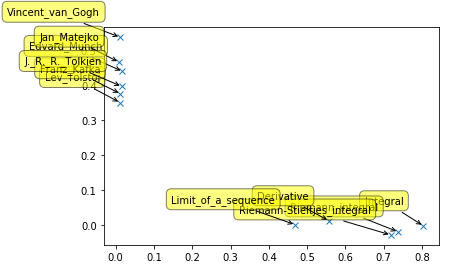

In [26]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

# Zad 
W zredukowanej przestrzeni proszę zaznaczyć

```python
query = ["Machine Learning", "Mathematics is art"]
```

In [27]:
query = ["Machine Learning", "Mathematics is art"]

new_vec = [dictionary.doc2bow(w.lower().split()) for w in query] 
print(new_vec) 
new_vec_tf = tfidf[new_vec]
# print
new_vec_tf_matrix = matutils.corpus2csc(new_vec_tf)
print(new_vec_tf_matrix.todense())


new_vec_tf_lsi = lsi[new_vec_tf] 
# print
new_vec_tf_lsi_matrix = matutils.corpus2dense(new_vec_tf_lsi, num_terms=2)
print(new_vec_tf_lsi_matrix)

[[(2329, 1), (4449, 1)], [(638, 1), (1936, 1)]]
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.79533561 0.        ]]
[[8.5274289e-05 1.0294119e-02]
 [4.8683309e-03 1.8187221e-02]]


In [28]:
query_red = new_vec_tf_lsi_matrix.T
query_red

array([[8.5274289e-05, 4.8683309e-03],
       [1.0294119e-02, 1.8187221e-02]], dtype=float32)

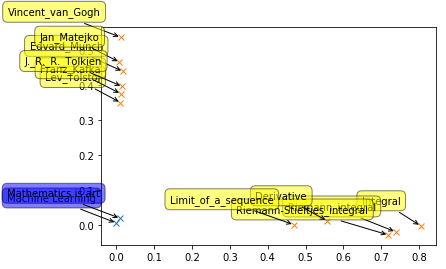

In [29]:
plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = query
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()